# Checking your network

Selecting which rates to include and which to exclude from your network is a bit of an art.  pynucastro has a few tools to help check what you might be missing.

Let's start by trying to create a network for carbon burning.

In [1]:
import pynucastro as pyna

In [2]:
reaclib_library = pyna.ReacLibLibrary()

To start, let's pick the nuclei $\alpha$, ${}^{12}\mathrm{C}$ and ${}^{20}\mathrm{Ne}$

In [3]:
nuclei = ["he4", "c12", "ne20"]
cburn_library = reaclib_library.linking_nuclei(nuclei)
print(cburn_library)

He4 + He4 + He4 ⟶ C12 + 𝛾      [Q =   7.28 MeV] (he4 + he4 + he4 --> c12 <fy05_reaclib__>)
C12 + C12 ⟶ He4 + Ne20         [Q =   4.62 MeV] (c12 + c12 --> he4 + ne20 <cf88_reaclib__>)
C12 ⟶ He4 + He4 + He4          [Q =  -7.28 MeV] (c12 --> he4 + he4 + he4 <fy05_reaclib__reverse>)
Ne20 + He4 ⟶ C12 + C12         [Q =  -4.62 MeV] (ne20 + he4 --> c12 + c12 <cf88_reaclib__reverse>)


Now, since we are primarily interested in ${}^{12}\mathrm{C} + {}^{12}\mathrm{C}$, let's make sure we are not missing any other reactions that have the same reactants.  The `validate()` method will do this, by comparing the rates we have selected to another library.

In [4]:
cburn_library.validate(reaclib_library)

validation: ne20 produced in C12 + C12 ⟶ He4 + Ne20 never consumed.


validation: missing He4 + He4 + He4 ⟶ p + B11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -8.682 MeV).
validation: missing He4 + He4 + He4 ⟶ n + C11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -11.4466 MeV).
validation: missing C12 + C12 ⟶ p + Na23 as alternative to C12 + C12 ⟶ He4 + Ne20 (Q = 2.242 MeV).
validation: missing C12 + C12 ⟶ n + Mg23 as alternative to C12 + C12 ⟶ He4 + Ne20 (Q = -2.598 MeV).


False

This tells us that we are missing 2 branches of the ${}^{12}\mathrm{C} + {}^{12}\mathrm{C}$ reaction.  ReacLib already scales the rates based on the branching of the products, so we should try to include these other branches.

Note: by default, `validate()` only checks forward rates.

To do so, we need to include the additional nuclei.  In particular, the branch that makes ${}^{23}\mathrm{Na}$ is likely important (the rate making ${}^{23}\mathrm{Mg}$ is endothermic, so less likely).

In [5]:
nuclei += ["p", "na23"]
cburn_library = reaclib_library.linking_nuclei(nuclei)
print(cburn_library)

He4 + He4 + He4 ⟶ C12 + 𝛾      [Q =   7.28 MeV] (he4 + he4 + he4 --> c12 <fy05_reaclib__>)
C12 + C12 ⟶ He4 + Ne20         [Q =   4.62 MeV] (c12 + c12 --> he4 + ne20 <cf88_reaclib__>)
C12 + C12 ⟶ p + Na23           [Q =   2.24 MeV] (c12 + c12 --> p + na23 <cf88_reaclib__>)
Na23 + p ⟶ He4 + Ne20          [Q =   2.38 MeV] (na23 + p --> he4 + ne20 <il10_reaclib__>)
C12 ⟶ He4 + He4 + He4          [Q =  -7.28 MeV] (c12 --> he4 + he4 + he4 <fy05_reaclib__reverse>)
Ne20 + He4 ⟶ C12 + C12         [Q =  -4.62 MeV] (ne20 + he4 --> c12 + c12 <cf88_reaclib__reverse>)
Ne20 + He4 ⟶ p + Na23          [Q =  -2.38 MeV] (ne20 + he4 --> p + na23 <il10_reaclib__reverse>)
Na23 + p ⟶ C12 + C12           [Q =  -2.24 MeV] (na23 + p --> c12 + c12 <cf88_reaclib__reverse>)


In [6]:
cburn_library.validate(reaclib_library)

validation: ne20 produced in C12 + C12 ⟶ He4 + Ne20 never consumed.
validation: ne20 produced in Na23 + p ⟶ He4 + Ne20 never consumed.


validation: missing He4 + He4 + He4 ⟶ p + B11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -8.682 MeV).
validation: missing He4 + He4 + He4 ⟶ n + C11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -11.4466 MeV).
validation: missing C12 + C12 ⟶ n + Mg23 as alternative to C12 + C12 ⟶ He4 + Ne20 (Q = -2.598 MeV).
validation: missing C12 + C12 ⟶ n + Mg23 as alternative to C12 + C12 ⟶ p + Na23 (Q = -2.598 MeV).
validation: missing Na23 + p ⟶ n + Mg23 as alternative to Na23 + p ⟶ He4 + Ne20 (Q = -4.839 MeV).
validation: missing Na23 + p ⟶ Mg24 + 𝛾 as alternative to Na23 + p ⟶ He4 + Ne20 (Q = 11.6927 MeV).


False

Now, looking at what is missing, we probably want to include ${}^{24}\mathrm{Mg}$ as an endpoint for carbon burning.

In [7]:
nuclei += ["mg24"]
cburn_library = reaclib_library.linking_nuclei(nuclei)
print(cburn_library)

He4 + He4 + He4 ⟶ C12 + 𝛾      [Q =   7.28 MeV] (he4 + he4 + he4 --> c12 <fy05_reaclib__>)
C12 + C12 ⟶ He4 + Ne20         [Q =   4.62 MeV] (c12 + c12 --> he4 + ne20 <cf88_reaclib__>)
C12 + C12 ⟶ p + Na23           [Q =   2.24 MeV] (c12 + c12 --> p + na23 <cf88_reaclib__>)
Ne20 + He4 ⟶ Mg24 + 𝛾          [Q =   9.32 MeV] (ne20 + he4 --> mg24 <il10_reaclib__>)
Na23 + p ⟶ He4 + Ne20          [Q =   2.38 MeV] (na23 + p --> he4 + ne20 <il10_reaclib__>)
Na23 + p ⟶ Mg24 + 𝛾            [Q =  11.69 MeV] (na23 + p --> mg24 <il10_reaclib__>)
C12 ⟶ He4 + He4 + He4          [Q =  -7.28 MeV] (c12 --> he4 + he4 + he4 <fy05_reaclib__reverse>)
Ne20 + He4 ⟶ C12 + C12         [Q =  -4.62 MeV] (ne20 + he4 --> c12 + c12 <cf88_reaclib__reverse>)
Ne20 + He4 ⟶ p + Na23          [Q =  -2.38 MeV] (ne20 + he4 --> p + na23 <il10_reaclib__reverse>)
Na23 + p ⟶ C12 + C12           [Q =  -2.24 MeV] (na23 + p --> c12 + c12 <cf88_reaclib__reverse>)
Mg24 ⟶ He4 + Ne20              [Q =  -9.32 MeV] (mg24 --> he4 + ne20 <il

In [8]:
cburn_library.validate(reaclib_library)

validation: mg24 produced in Ne20 + He4 ⟶ Mg24 + 𝛾 never consumed.
validation: mg24 produced in Na23 + p ⟶ Mg24 + 𝛾 never consumed.


validation: missing He4 + He4 + He4 ⟶ p + B11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -8.682 MeV).
validation: missing He4 + He4 + He4 ⟶ n + C11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -11.4466 MeV).
validation: missing C12 + C12 ⟶ n + Mg23 as alternative to C12 + C12 ⟶ He4 + Ne20 (Q = -2.598 MeV).
validation: missing C12 + C12 ⟶ n + Mg23 as alternative to C12 + C12 ⟶ p + Na23 (Q = -2.598 MeV).
validation: missing Ne20 + He4 ⟶ n + Mg23 as alternative to Ne20 + He4 ⟶ Mg24 + 𝛾 (Q = -7.21457 MeV).
validation: missing Na23 + p ⟶ n + Mg23 as alternative to Na23 + p ⟶ He4 + Ne20 (Q = -4.839 MeV).
validation: missing Na23 + p ⟶ n + Mg23 as alternative to Na23 + p ⟶ Mg24 + 𝛾 (Q = -4.839 MeV).


False

Now that we are happy with this, we can make a `RateCollection` and plot it

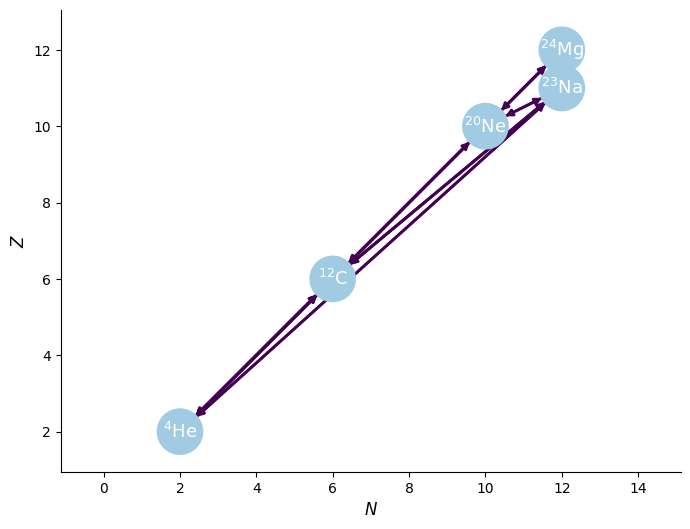

In [9]:
rc = pyna.RateCollection(libraries=[cburn_library])
rc.plot()